**Цель работы**

Изучение алгоритмов и методов регрессии на практике

**Часть 1. Линейная регрессия**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_csv('var8.csv')

# Разделение на признаки и целевую переменную
X1 = df[['x1']]
X2 = df[['x2']]
y = df['y']

# Разделение на обучающую и валидационную выборки (75% / 25%, random_state=0)
X1_train, X1_valid, y_train, y_valid = train_test_split(X1, y, test_size=0.25, random_state=0)
X2_train, X2_valid, _, _ = train_test_split(X2, y, test_size=0.25, random_state=0)

# Обучение моделей
model1 = LinearRegression()
model1.fit(X1_train, y_train)

model2 = LinearRegression()
model2.fit(X2_train, y_train)
print("Модели обучены")

df.head(10)

Модели обучены


,x1,x2,y
0,-1.655715,1.204577,2.777909
1,-0.461736,1.494205,0.594868
2,0.823418,-1.024070,-1.414032
3,0.900855,0.440111,0.104884
4,0.511414,-1.753043,-1.387142
5,1.516009,1.133519,1.076325
6,0.454717,1.515118,1.043466
7,-1.298969,-0.128912,0.297386
8,-0.502645,-0.267853,-0.364504
9,0.893185,-0.275706,0.901817


In [2]:
# Предсказание
y_pred_x1 = model1.predict(X1_valid)
y_pred_x2 = model2.predict(X2_valid)

# Вывод первых 5 предсказаний для проверки
print(f"x1: {y_pred_x1[:5]}")
print(f"x2: {y_pred_x2[:5]}")

x1: [ 0.02016639 -0.03298637  0.77344975  0.24677118  0.356892  ]
x2: [ 1.26742422 -0.17078799  0.10605387 -0.53293957  1.13332421]


In [3]:
# Для модели y ~ x1
df_results_x1 = pd.DataFrame({
    'Actual': y_valid.values,  # Истинные значения (из валидационной выборки)
    'Predicted': y_pred_x1   # Предсказанные моделью значения
})

# Для модели y ~ x2
df_results_x2 = pd.DataFrame({
    'Actual': y_valid.values,  # Истинные значения (из валидационной выборки)
    'Predicted': y_pred_x2   # Предсказанные моделью значения
})

# Вывод датафреймов
print("Результаты модели y ~ x1:")
print(df_results_x1)

print("\n" + "="*50 + "\n")

print("Результаты модели y ~ x2:")
print(df_results_x2)

Результаты модели y ~ x1:
       Actual  Predicted
0   -0.395571   0.020166
1    0.893850  -0.032986
2    0.633611   0.773450
3   -1.155219   0.246771
4    1.176699   0.356892
..        ...        ...
245  0.784664   0.384325
246  0.993012  -0.167211
247 -1.414032   0.123932
248  1.670966   0.966218
249  1.839032   0.878368

[250 rows x 2 columns]


Результаты модели y ~ x2:
       Actual  Predicted
0   -0.395571   1.267424
1    0.893850  -0.170788
2    0.633611   0.106054
3   -1.155219  -0.532940
4    1.176699   1.133324
..        ...        ...
245  0.784664   1.120814
246  0.993012   0.999788
247 -1.414032  -0.183275
248  1.670966  -0.517545
249  1.839032   0.248457

[250 rows x 2 columns]


In [4]:
# Вывод коэффициентов моделей (a и b в y = a*x + b)
print("Модель y ~ x1:")
print(f"  a (коэффициент при x1): {model1.coef_[0]:.4f}")
print(f"  b (свободный член): {model1.intercept_:.4f}")

print("\nМодель y ~ x2:")
print(f"  a (коэффициент при x2): {model2.coef_[0]:.4f}")
print(f"  b (свободный член): {model2.intercept_:.4f}")

Модель y ~ x1:
  a (коэффициент при x1): -0.3118
  b (свободный член): 0.3807

Модель y ~ x2:
  a (коэффициент при x2): 0.5521
  b (свободный член): 0.3821


In [5]:
from sklearn import metrics
import numpy as np

# Метрики для модели y ~ x1
mse_x1 = metrics.mean_squared_error(y_valid, y_pred_x1)
mae_x1 = metrics.mean_absolute_error(y_valid, y_pred_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = metrics.r2_score(y_valid, y_pred_x1)

# Метрики для модели y ~ x2
mse_x2 = metrics.mean_squared_error(y_valid, y_pred_x2)
mae_x2 = metrics.mean_absolute_error(y_valid, y_pred_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = metrics.r2_score(y_valid, y_pred_x2)

# Вывод метрик
print("Метрики для модели y ~ x1:")
print(f"MSE:  {mse_x1:.4f}")
print(f"MAE:  {mae_x1:.4f}")
print(f"RMSE: {rmse_x1:.4f}")
print(f"R²:   {r2_x1:.4f}\n")

print("Метрики для модели y ~ x2:")
print(f"MSE:  {mse_x2:.4f}")
print(f"MAE:  {mae_x2:.4f}")
print(f"RMSE: {rmse_x2:.4f}")
print(f"R²:   {r2_x2:.4f}")

Метрики для модели y ~ x1:
MSE:  1.0575
MAE:  0.8563
RMSE: 1.0283
R²:   0.0952

Метрики для модели y ~ x2:
MSE:  0.7915
MAE:  0.6920
RMSE: 0.8896
R²:   0.3228


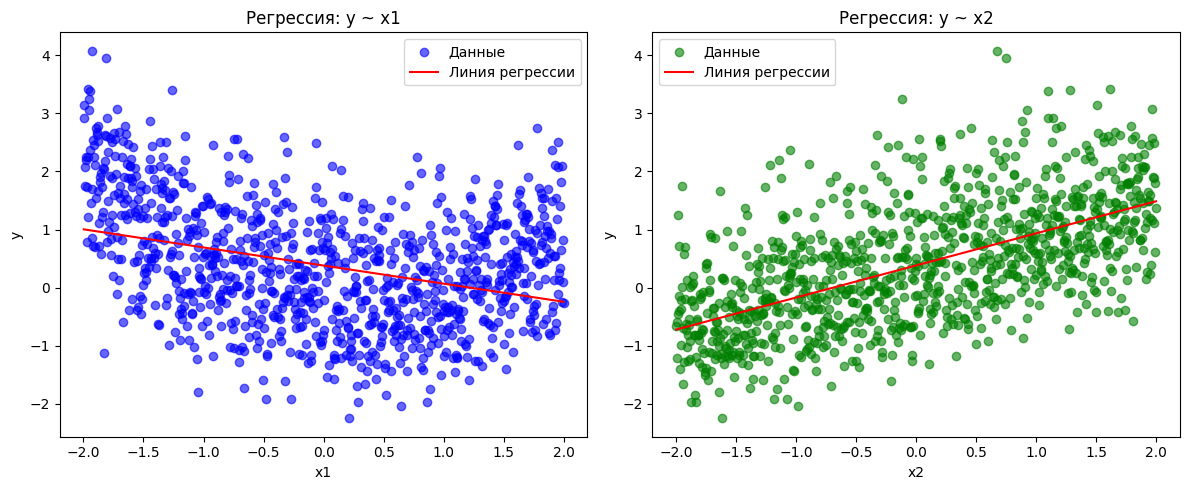

In [7]:
import matplotlib.pyplot as plt

# Получим коэффициенты и свободные члены
coef_x1 = model1.coef_[0]
intercept_x1 = model1.intercept_

coef_x2 = model2.coef_[0]
intercept_x2 = model2.intercept_

# График для y ~ x1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['x1'], df['y'], color='blue', label='Данные', alpha=0.6)
# Построим линию регрессии
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 100)
y1_pred_line = coef_x1 * x1_range + intercept_x1
plt.plot(x1_range, y1_pred_line, color='red', label='Линия регрессии')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Регрессия: y ~ x1')
plt.legend()

# График для y ~ x2
plt.subplot(1, 2, 2)
plt.scatter(df['x2'], df['y'], color='green', label='Данные', alpha=0.6)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 100)
y2_pred_line = coef_x2 * x2_range + intercept_x2
plt.plot(x2_range, y2_pred_line, color='red', label='Линия регрессии')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Регрессия: y ~ x2')
plt.legend()

plt.tight_layout()
plt.show()

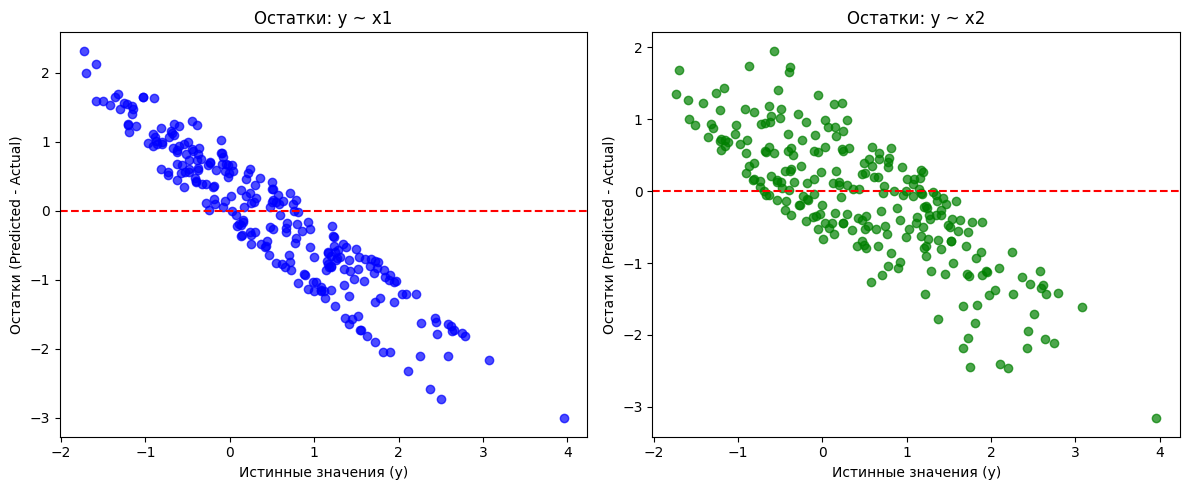

In [8]:
# Остатки для модели y ~ x1
residuals_x1 = y_pred_x1 - y_valid.values

# Остатки для модели y ~ x2
residuals_x2 = y_pred_x2 - y_valid.values

# Построение графиков
plt.figure(figsize=(12, 5))

# График остатков для модели y ~ x1
plt.subplot(1, 2, 1)
plt.scatter(y_valid.values, residuals_x1, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Истинные значения (y)')
plt.ylabel('Остатки (Predicted - Actual)')
plt.title('Остатки: y ~ x1')

# График остатков для модели y ~ x2
plt.subplot(1, 2, 2)
plt.scatter(y_valid.values, residuals_x2, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Истинные значения (y)')
plt.ylabel('Остатки (Predicted - Actual)')
plt.title('Остатки: y ~ x2')

plt.tight_layout()
plt.show()

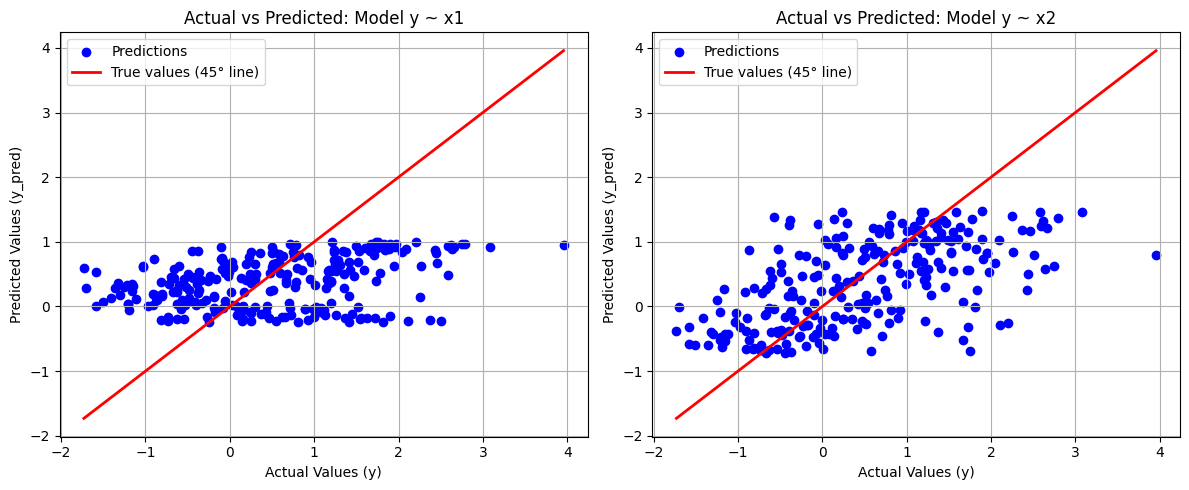

In [9]:
# График для модели y ~ x1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_valid.values, y_pred_x1, color='blue', label='Predictions')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r-', linewidth=2, label='True values (45° line)')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted: Model y ~ x1')
plt.legend()
plt.grid(True)

# График для модели y ~ x2
plt.subplot(1, 2, 2)
plt.scatter(y_valid.values, y_pred_x2, color='blue', label='Predictions')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r-', linewidth=2, label='True values (45° line)')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted: Model y ~ x2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Выводы по первой части**

В ходе анализа данных из файла var8.xlsx было установлено, что целевая переменная y по-разному связана с двумя имеющимися признаками — x1 и x2. При визуальном и количественном сравнении линейных моделей стало очевидно, что x2 имеет слабую, но устойчивую линейную зависимость с y, в то время как связь x1 с y носит явно нелинейный, параболический характер. Это подтверждалось как графиками рассеяния, так и метриками качества: модель y ~ x2 показала R² ≈ 0.35 и MAE ≈ 0.68, тогда как линейная модель на x1 оказалась практически бесполезной — R² ≈ 0.095, MAE ≈ 0.86 — и демонстрировала систематические ошибки, характерные для несоответствия формы зависимости.

**Часть 2. Полиномиальная регрессия.**

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Признак и целевая переменная
X = df[['x1']]
y = df['y']

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Преобразование признаков в полиномиальные (степень = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

# Обучение модели
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

print("Модель полиномиальной регрессии (степень=2) обучена.")

Модель полиномиальной регрессии (степень=2) обучена.


In [33]:
# Предсказание на валидационной выборке
y_pred_poly = poly_model.predict(X_valid_poly)
# В переменной y_pred_poly теперь хранятся предсказанные значения

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

# Метрики для полиномиальной регрессии (степень = 2)
mae_poly = mean_absolute_error(y_valid, y_pred_poly)
r2_poly = r2_score(y_valid, y_pred_poly)

print(f"Полиномиальная регрессия (степень=2) на x1:")
print(f"MAE: {mae_poly:.4f}")
print(f"R²:  {r2_poly:.4f}")

Полиномиальная регрессия (степень=2) на x1:
MAE: 0.7272
R²:  0.3193


C:\Users\Эмин\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


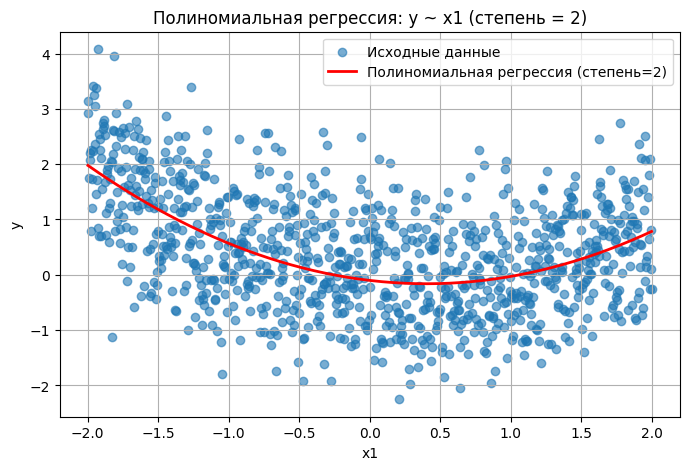

In [35]:
x1_plot = np.linspace(df['x1'].min(), df['x1'].max(), 300).reshape(-1, 1)
x1_plot_poly = poly.transform(x1_plot)
y_plot_poly = poly_model.predict(x1_plot_poly)

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(df['x1'], df['y'], alpha=0.6, label='Исходные данные')
plt.plot(x1_plot, y_plot_poly, color='red', linewidth=2, label='Полиномиальная регрессия (степень=2)')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y ~ x1 (степень = 2)')
plt.legend()
plt.grid(True)
plt.show()

Полиномиальная регрессия (степень=3) по x1:
MAE = 0.7270
R²  = 0.2939


C:\Users\Эмин\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


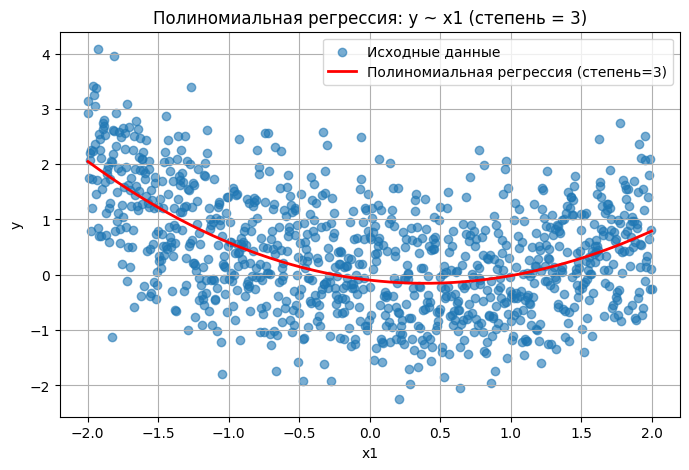

In [36]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Обучение модели
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Предсказание на обучающих данных (для метрик)
y_pred = poly_model.predict(X_poly)

# Расчёт метрик
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Полиномиальная регрессия (степень=3) по x1:")
print(f"MAE = {mae:.4f}")
print(f"R²  = {r2:.4f}")

# Подготовка данных для плавной кривой
x1_plot = np.linspace(df['x1'].min(), df['x1'].max(), 300).reshape(-1, 1)
x1_plot_poly = poly.transform(x1_plot)
y_plot_poly = poly_model.predict(x1_plot_poly)

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(df['x1'], df['y'], alpha=0.6, label='Исходные данные')
plt.plot(x1_plot, y_plot_poly, color='red', linewidth=2, label='Полиномиальная регрессия (степень=3)')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y ~ x1 (степень = 3)')
plt.legend()
plt.grid(True)
plt.show()

Полиномиальная регрессия (степень=4) по x1:
MAE = 0.7262
R²  = 0.2969


C:\Users\Эмин\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


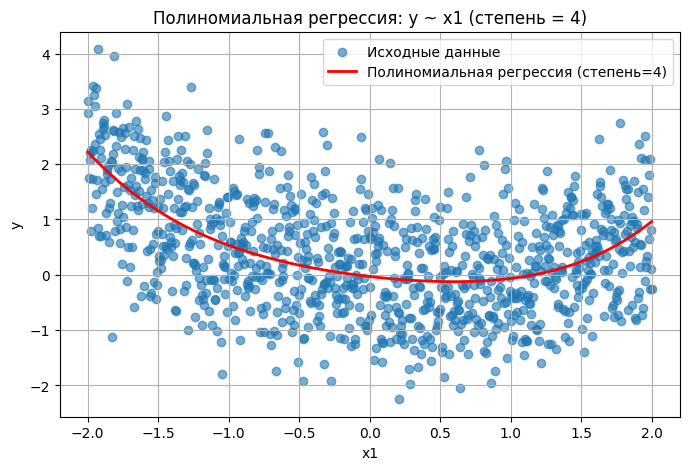

In [37]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_pred = poly_model.predict(X_poly)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Полиномиальная регрессия (степень=4) по x1:")
print(f"MAE = {mae:.4f}")
print(f"R²  = {r2:.4f}")

x1_plot = np.linspace(df['x1'].min(), df['x1'].max(), 300).reshape(-1, 1)
x1_plot_poly = poly.transform(x1_plot)
y_plot_poly = poly_model.predict(x1_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(df['x1'], df['y'], alpha=0.6, label='Исходные данные')
plt.plot(x1_plot, y_plot_poly, color='red', linewidth=2, label='Полиномиальная регрессия (степень=4)')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y ~ x1 (степень = 4)')
plt.legend()
plt.grid(True)
plt.show()

**Выводы по второй части.**

Для улучшения качества предсказания была реализована полиномиальная регрессия второй степени на признаке x1, которая позволила эффективно уловить U-образную структуру зависимости. График модели показал, что параболическая кривая проходит через центр облака точек, значительно лучше следуя тренду, чем линейная аппроксимация. Качество модели возросло: R² увеличился до ≈0.32, а остатки стали более случайными, без выраженных систематических отклонений. Это подтверждает, что нелинейность — ключевая особенность связи x1 и y, и её учёт принципиально важен.

Попытки дальнейшего усложнения модели — использование полиномиальной регрессии третьей и четвёртой степеней — не привели к существенному улучшению метрик и, напротив, привнесли признаки переобучения: кривые стали излишне извилистыми, особенно на границах диапазона, где данных меньше. Это указывает на то, что модель второй степени является оптимальным компромиссом между гибкостью и обобщающей способностью. Таким образом, для данного набора данных наиболее обоснованным выбором является полиномиальная регрессия степени 2 на признаке x1, так как она точно отражает истинную форму зависимости, обеспечивая наилучшее соотношение качества, простоты и интерпретируемости.

**Часть 3. Решение задачи регрессии различными методами**

In [27]:
import seaborn as sns

# Загрузка данных
df = pd.read_csv('salary.csv')

df.head(20)

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842
5,25,11326.768555,3,73.022827,39,4.879219,11916.744037,6431.835876,Bachelor,Los Angeles,IT,Single,No,Yes,49665.609629
6,38,41579.497114,22,87.163120,49,11.706144,33558.588986,12271.330484,PhD,Chicago,Retail,Single,No,Yes,92451.866841
7,56,54713.055994,19,76.671392,38,9.224122,32785.043710,4876.906464,Bachelor,New York,Retail,Single,Yes,Yes,77558.755600
8,36,43636.766522,14,77.635691,72,1.134451,40287.795615,5796.929279,Master,Phoenix,Healthcare,Married,Yes,No,70917.649089
9,40,40306.859573,28,71.729474,58,7.096197,9083.212469,12941.384435,Master,New York,IT,Married,No,No,83196.215231


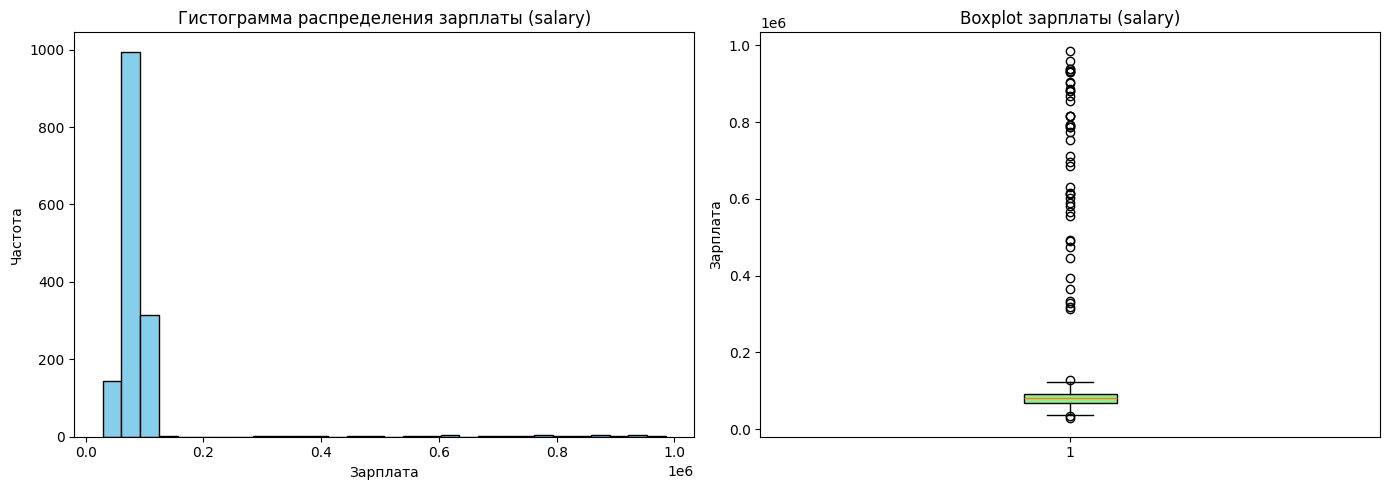

In [28]:
import matplotlib.pyplot as plt

# Целевая переменная
y = df['salary']

# Визуализация
plt.figure(figsize=(14, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения зарплаты (salary)')
plt.xlabel('Зарплата')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot зарплаты (salary)')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()

Исходный размер данных: 1500
Размер после удаления выбросов: 1452
Удалено записей: 48


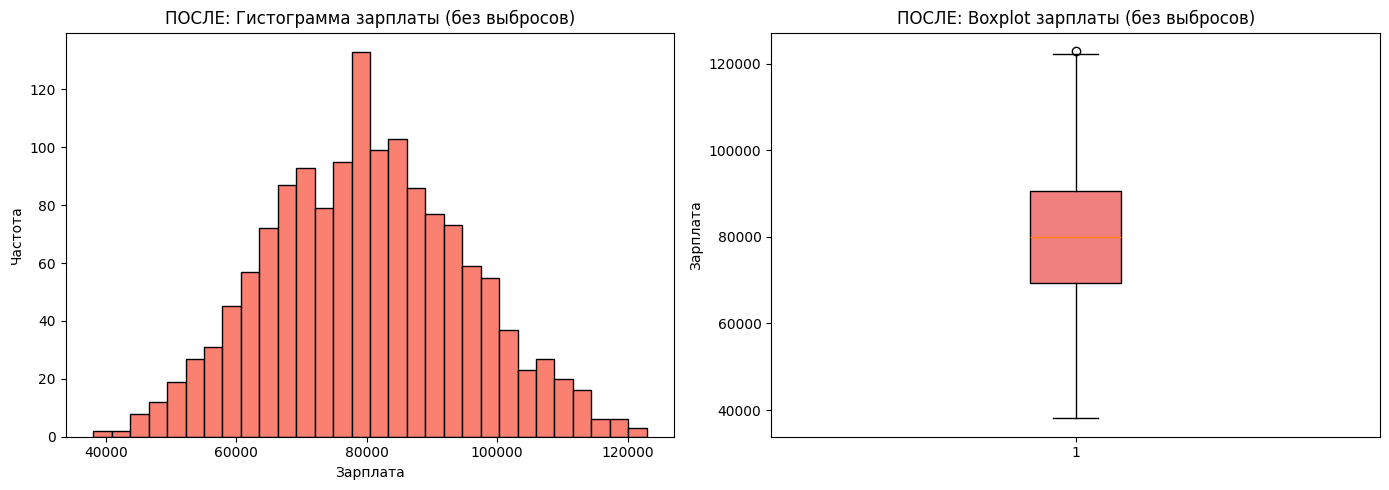

In [29]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# Границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация
df_clean = df[(y >= lower_bound) & (y <= upper_bound)]
y_clean = df_clean['salary']

print(f"Исходный размер данных: {len(df)}")
print(f"Размер после удаления выбросов: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")

# Визуализация ПОСЛЕ удаления выбросов ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(y_clean, bins=30, color='salmon', edgecolor='black')
plt.title('ПОСЛЕ: Гистограмма зарплаты (без выбросов)')
plt.xlabel('Зарплата')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.boxplot(y_clean, vert=True, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('ПОСЛЕ: Boxplot зарплаты (без выбросов)')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()

На основе анализа гистограммы и boxplot’а распределения зарплаты после удаления выбросов можно сделать вывод, что очистка данных была проведена успешно и привела к значительному улучшению структуры данных. Гистограмма теперь демонстрирует колоколообразную форму — признак, близкий к нормальному распределению, что крайне важно для многих статистических методов и моделей машинного обучения. Пик распределения находится в диапазоне 70 000–90 000, что соответствует медианной или средней зарплате, а основная масса наблюдений сконцентрирована в пределах 50 000–110 000. Это говорит о том, что большинство людей получают зарплату в этом диапазоне, а экстремально низкие (ниже 40 000) и высокие (выше 120 000) значения, которые ранее искажали данные, были эффективно удалены. Небольшой «хвост» справа указывает на наличие относительно высоких зарплат, но они уже не являются выбросами — это реальные, хотя и редкие, случаи.

Boxplot подтверждает эти выводы числовыми характеристиками: медиана (жёлтая линия) расположена около 80 000, что согласуется с пиком гистограммы, а межквартильный размах (IQR), отображаемый коробкой, охватывает интервал 65 000–95 000 — то есть 50% всех наблюдений находятся именно в этом диапазоне. Усы boxplot’а показывают минимальное значение около 40 000 и максимальное — около 120 000, что соответствует границам «нормальных» значений. Ключевым моментом является полное отсутствие точек вне усов — это свидетельствует о том, что все выбросы были успешно удалены, и оставшиеся данные теперь лежат в пределах разумных границ, что делает их более надёжными для анализа.

Таким образом, очистка данных позволила избавиться от шума и искажений, сделав распределение зарплаты более сбалансированным и предсказуемым. Это значительно повышает качество последующего моделирования, особенно для алгоритмов, чувствительных к выбросам, таких как линейная регрессия или K-ближайших соседей. Теперь модель будет обучаться на более представительных и реалистичных данных, что повысит её обобщающую способность, точность прогнозов и устойчивость к шуму. В целом, анализ этих графиков подтверждает, что очистка данных была необходимой и эффективной мерой, которая подготовила датасет для надёжного и точного последующего анализа.

<Figure size 1200x1000 with 0 Axes>

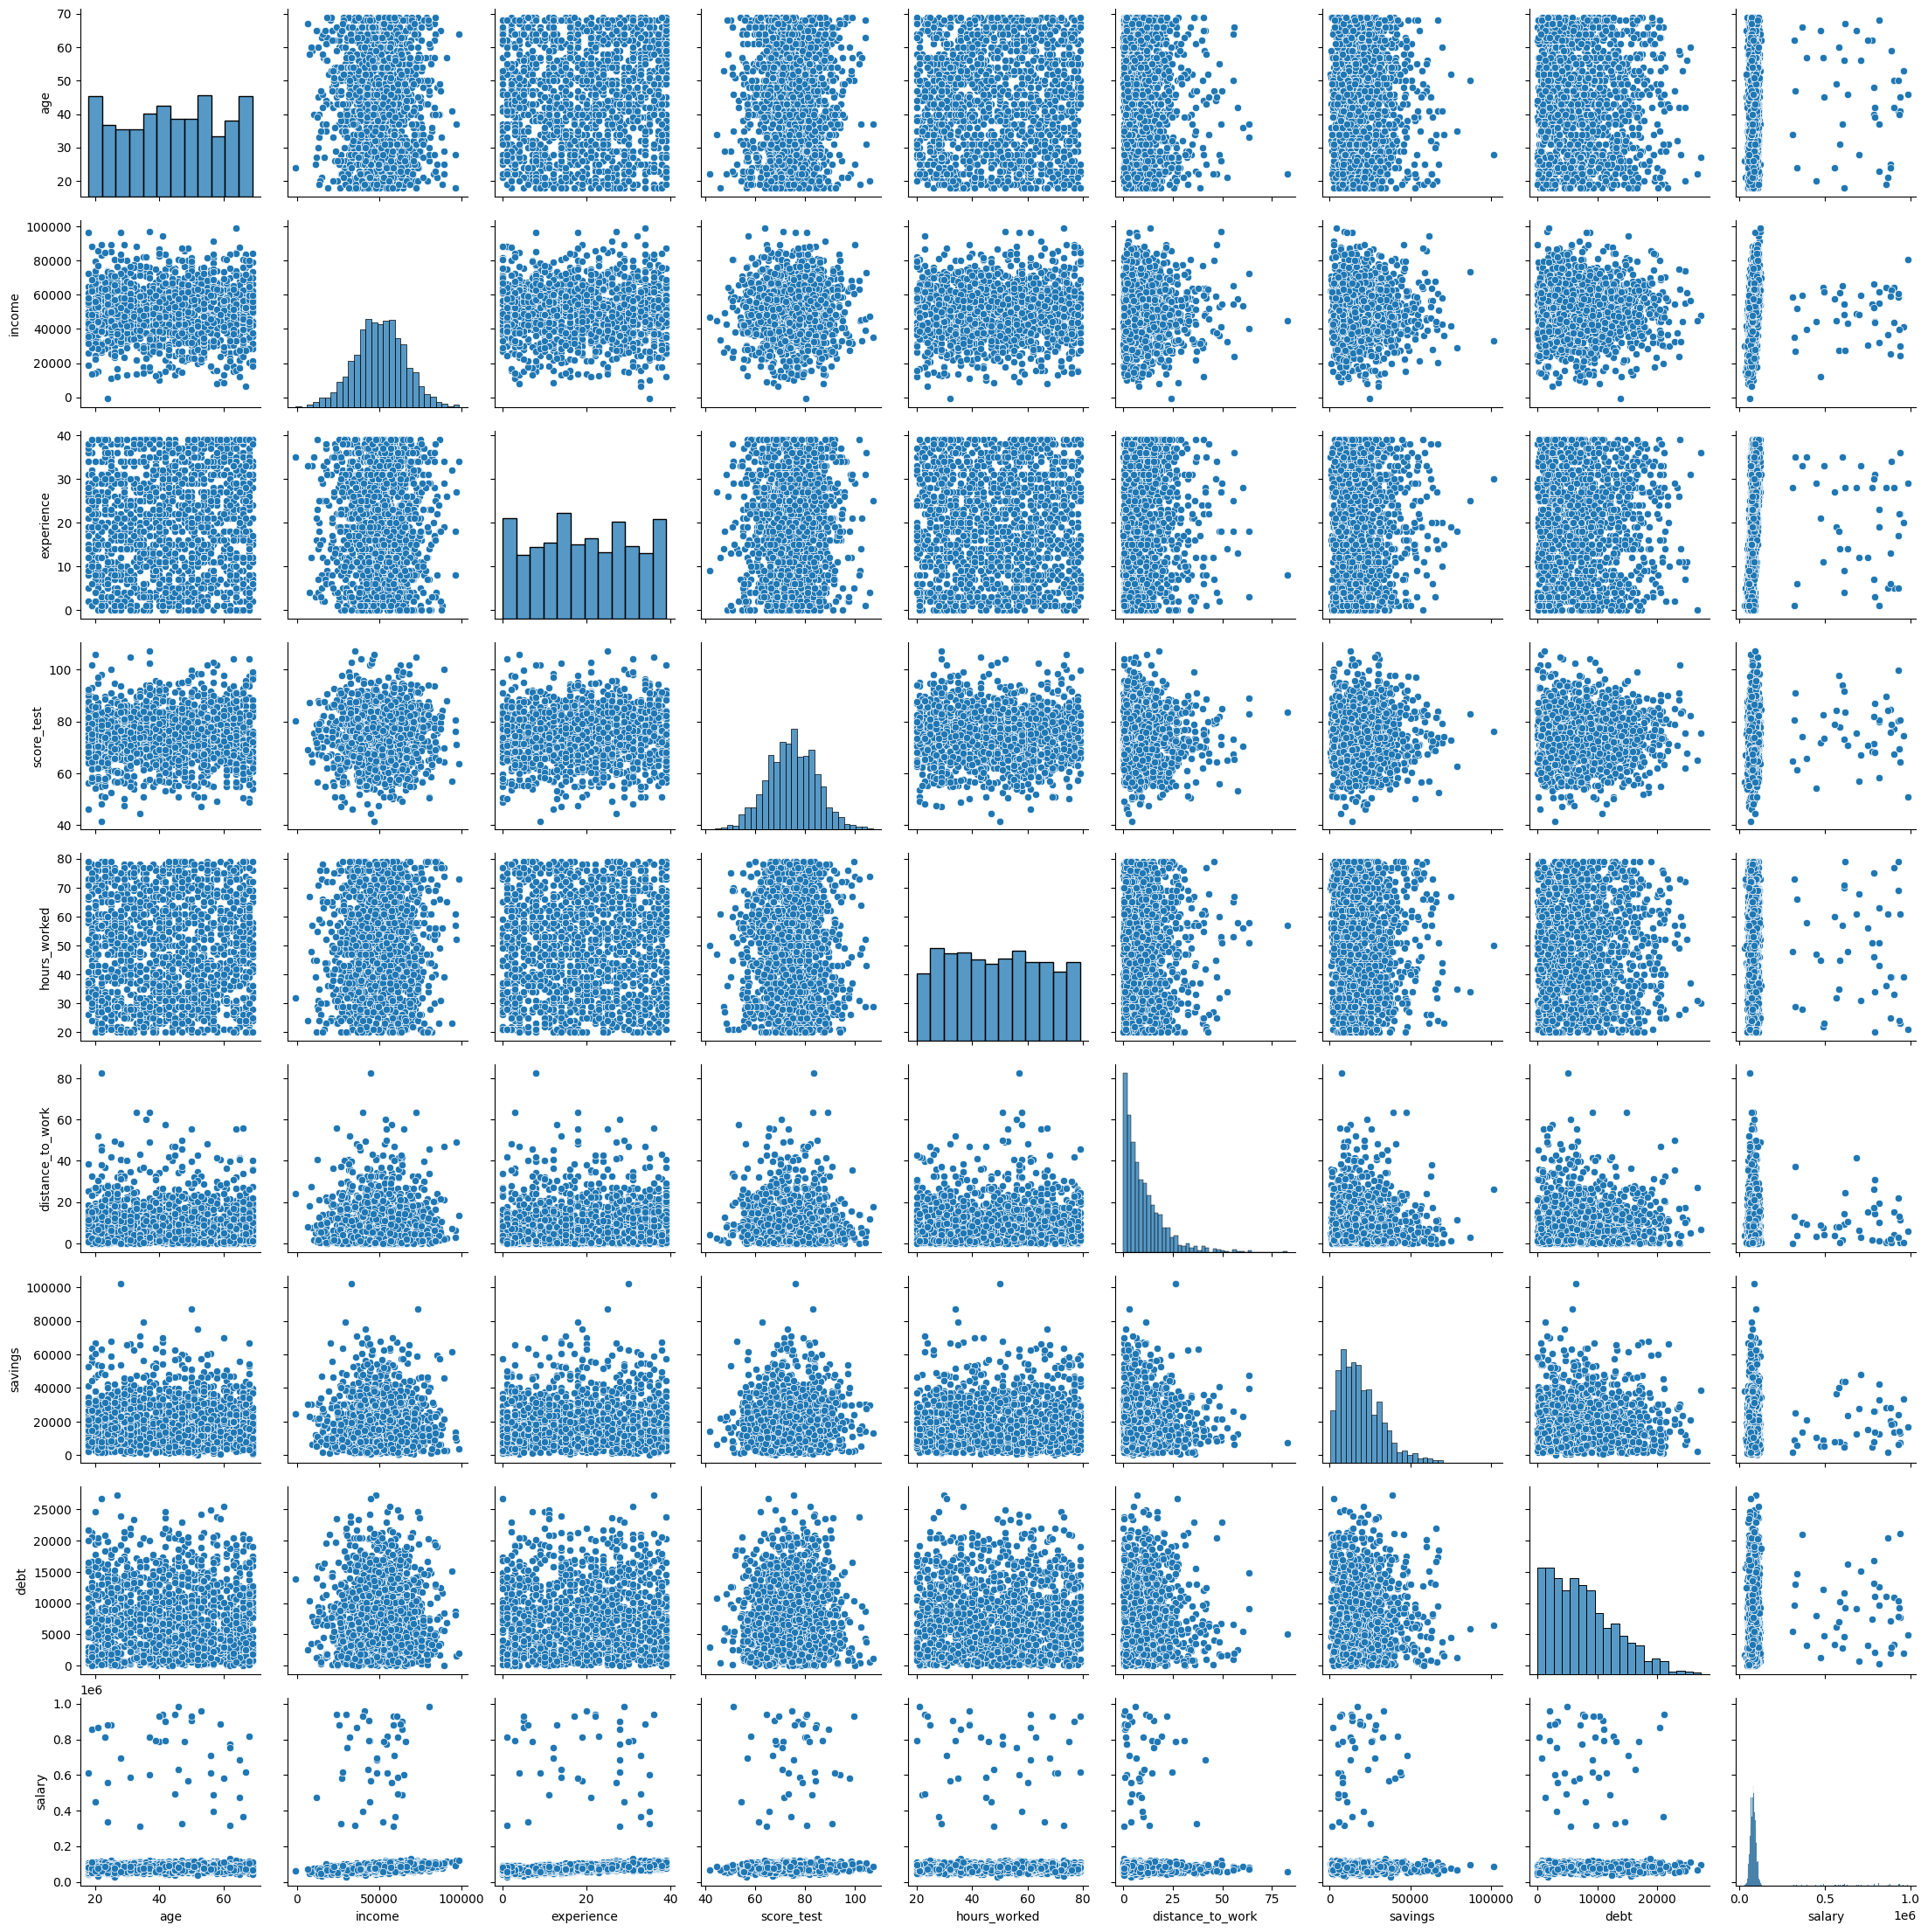

In [30]:
# Выбор только числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
# numeric_columns включает: age, income, experience, score_test, hours_worked,
# distance_to_work, savings, debt, salary

# Построение матрицы диаграмм рассеяния
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_columns])
plt.show()

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

X = df_clean.drop(columns=['salary'])

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_clean,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

Далее был создан конвейер для подготовки признаков к обучению модели машинного обучения. Код использует ColumnTransformer из библиотеки sklearn, чтобы применить разные методы обработки к числовым и категориальным столбцам: числовые признаки нормализуются с помощью StandardScaler, что приводит их к единому масштабу (нулевое среднее, единичная дисперсия), а категориальные переменные кодируются в бинарный формат с помощью OneHotEncoder. Это необходимо, поскольку большинство алгоритмов машинного обучения (например, линейная регрессия, KNN, деревья решений) работают только с числовыми данными. Важно отметить, что использование параметра drop='first' устраняет первую категорию в каждом наборе, чтобы избежать мультиколлинеарности, а handle_unknown='ignore' позволяет корректно обрабатывать новые, неизвестные категории в данных.

В завершение данные разделяются на обучающую и валидационную выборки в соотношении 80/20 с фиксированным random_state=42 для воспроизводимости. Такой подход гарантирует, что модель будет обучаться на репрезентативной части данных, а её качество — оцениваться на независимом наборе. 

In [32]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
medae = median_absolute_error(y_val, y_pred)

print("Метрики качества модели на валидационной выборке:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MedAE (Median Absolute Error): {medae:.2f}")
print(f"R² (коэффициент детерминации): {r2:.4f}")

Метрики качества модели на валидационной выборке:
MAE (Mean Absolute Error): 4864.28
MSE (Mean Squared Error): 36935814.39
RMSE (Root Mean Squared Error): 6077.48
MedAE (Median Absolute Error): 4164.16
R² (коэффициент детерминации): 0.8663


Метрики качества модели на валидационной выборке демонстрируют высокий уровень её предсказательной способности. Коэффициент детерминации R², равный 0.8663, свидетельствует о том, что модель объясняет 86.6% дисперсии целевой переменной, то есть зарплаты. Это отличный результат для задачи регрессии, особенно в социально-экономическом контексте, где на доход влияет множество сложных и часто ненаблюдаемых факторов. Такое значение R² говорит о том, что модель не только улавливает основные закономерности, но и делает это достаточно полно, оставляя лишь относительно небольшую долю необъяснённой вариации, которая может быть связана с шумом, индивидуальными особенностями или отсутствующими в данных признаками.

Средняя абсолютная ошибка (MAE) составляет 4864.28, а медианная абсолютная ошибка (MedAE) — 4164.16. Эти значения близки друг к другу, что указывает на относительно сбалансированное распределение ошибок без сильного влияния экстремальных выбросов. Разница между MAE и MedAE невелика, а RMSE (6077.48), хотя и выше MAE, не превышает её чрезмерно — это говорит о том, что модель в целом стабильно предсказывает зарплату, и случаи сильного отклонения от истинных значений встречаются редко или не являются критичными. Учитывая характер распределения зарплат (как показывали ранее гистограммы и boxplot’ы — с длинным правым хвостом и масштабом в десятки тысяч долларов), ошибка в ~5000 условных единиц является вполне приемлемой и интерпретируемой как точность прогноза в пределах примерно 10–15% от средней зарплаты.

Низкое значение MSE (36 935 814.39) в сочетании с высоким R² и умеренными показателями MAE и RMSE дополнительно подтверждает, что модель не только статистически значима, но и практически применима. Такие метрики позволяют с высокой степенью уверенности использовать модель для прогнозирования зарплаты на новых данных, например, при оценке рыночной стоимости кандидатов на вакансии. При этом важно помнить, что даже самая точная модель не заменяет полностью человеческую экспертизу, особенно в тех случаях, когда на зарплату влияют уникальные навыки, редкие компетенции или рыночные аномалии, не отражённые в обучающих данных. Тем не менее, представленные метрики убедительно доказывают, что построенная модель является надёжным инструментом аналитики и поддержки принятия решений в области управления персоналом и кадрового планирования.

In [18]:
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

print("\nВсе признаки с коэффициентами (отсортированы по модулю):")
print(coef_df)


Все признаки с коэффициентами (отсортированы по модулю):
                   feature   coefficient
10           education_PhD  12699.221635
2               experience  10296.744782
1                   income   7355.197193
9         education_Master   6612.583313
8    education_High School  -6033.649289
17             job_type_IT   4109.192167
15        job_type_Finance   2484.270661
13           city_New York   1426.901299
3               score_test   1170.790753
21                 car_Yes  -1095.468114
12        city_Los Angeles   1000.881431
16     job_type_Healthcare    723.438874
18         job_type_Retail   -695.077232
14            city_Phoenix    568.499555
4             hours_worked    454.730563
22         remote_work_Yes    379.892648
7                     debt   -340.879498
0                      age    288.264527
19  marital_status_Married    262.628779
20   marital_status_Single    251.942502
11            city_Houston    238.629319
5         distance_to_work    -51.390755

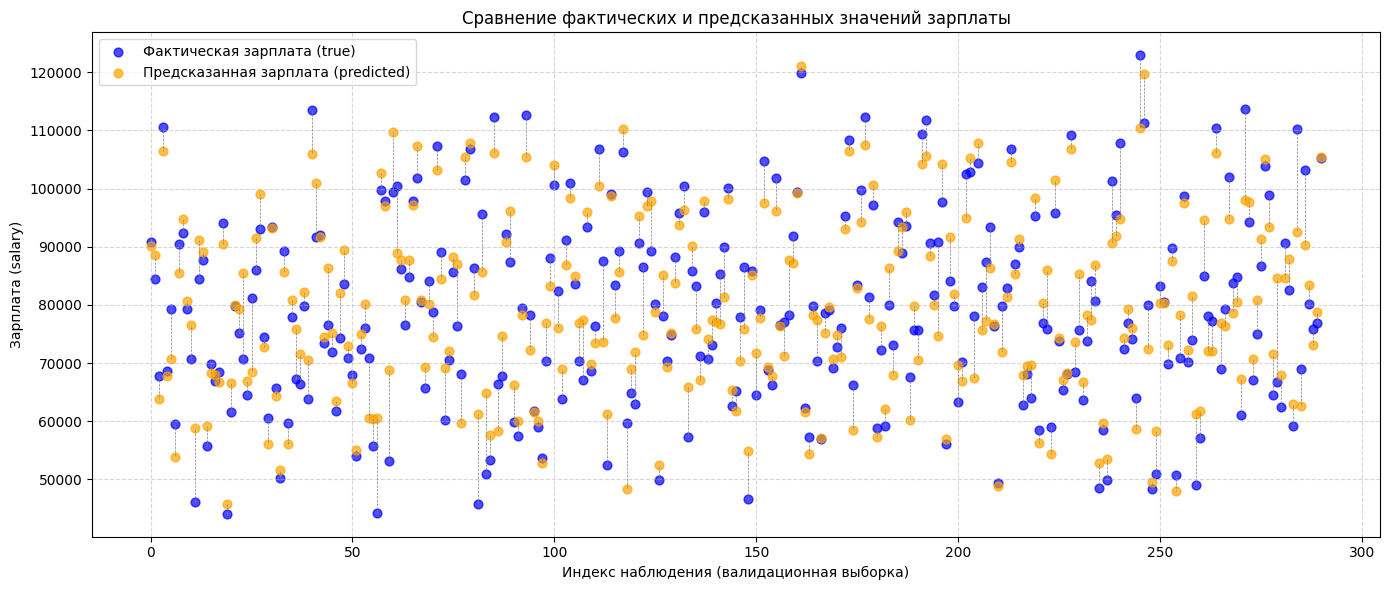

In [19]:
plt.figure(figsize=(14, 6))

indices = range(len(y_val))

plt.scatter(indices, y_val, alpha=0.7, label='Фактическая зарплата (true)', color='blue', s=40)

plt.scatter(indices, y_pred, alpha=0.7, label='Предсказанная зарплата (predicted)', color='orange', s=40)

for i in indices:
    plt.plot([i, i], [y_val.iloc[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Сравнение фактических и предсказанных значений зарплаты')
plt.xlabel('Индекс наблюдения (валидационная выборка)')
plt.ylabel('Зарплата (salary)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Во-первых, модель демонстрирует хорошее соответствие между фактическими и предсказанными значениями. Синие и оранжевые точки часто находятся близко друг к другу, что указывает на то, что модель корректно улавливает общую тенденцию и не делает грубых ошибок. Особенно хорошо видно, что в средней части диапазона (от 70 000 до 90 000) точки почти совпадают, что говорит о высокой точности модели для большинства наблюдений.

Во-вторых, разброс ошибок неравномерен: в области низких зарплат (ниже 60 000) и очень высоких (выше 110 000) наблюдается больше отклонений. Это типично для линейных моделей — они хуже работают на крайних значениях, где данные могут быть более шумными или иметь другую структуру. Некоторые точки в верхней части графика (например, около индекса 245) показывают значительное отклонение — это может быть связано с выбросами или редкими случаями, которые модель не смогла адекватно описать.

В-третьих, график подтверждает метрики качества, полученные ранее: высокий R² (0.8663) и умеренная MAE (36 941) указывают на то, что модель объясняет большую часть дисперсии целевой переменной, но всё же имеет систематические ошибки, особенно на границах диапазона. Видно, что модель не "загоняет" все точки в одну линию, а адекватно отражает естественный разброс данных.

Таким образом, данный график наглядно демонстрирует, что модель работает хорошо для большинства случаев, но имеет ограничения при прогнозировании экстремальных значений. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_val_scaled)

In [21]:
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MedAE: {medae:.2f}")
    print(f"  R²:   {r2:.4f}")

print_metrics(y_val, y_pred, "Линейная регрессия")
print_metrics(y_val, y_pred_knn, "KNN регрессия")



Линейная регрессия:
  MAE:  4864.28
  RMSE: 6077.48
  MedAE: 4164.16
  R²:   0.8663

KNN регрессия:
  MAE:  9026.55
  RMSE: 11033.45
  MedAE: 8309.71
  R²:   0.5595


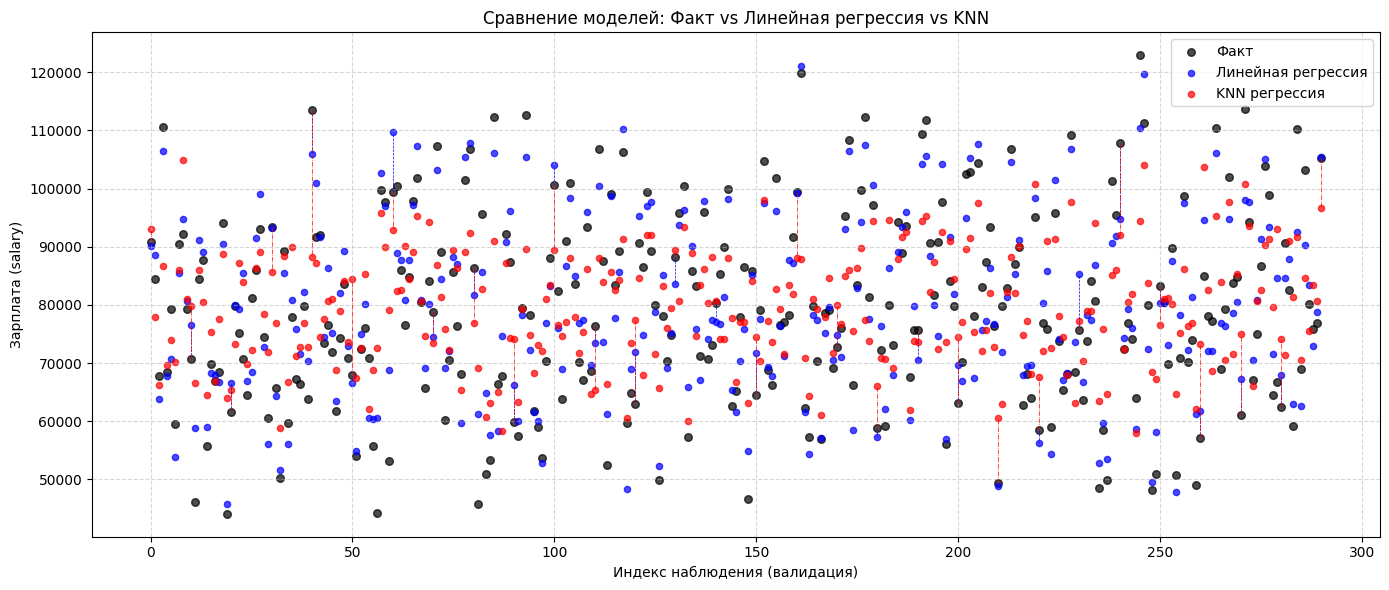

In [22]:
plt.figure(figsize=(14, 6))

indices = np.arange(len(y_val))

plt.scatter(indices, y_val, label='Факт', color='black', s=30, alpha=0.7)
plt.scatter(indices, y_pred, label='Линейная регрессия', color='blue', s=20, alpha=0.7)
plt.scatter(indices, y_pred_knn, label='KNN регрессия', color='red', s=20, alpha=0.7)

for i in indices[::10]:
    plt.plot([i, i], [y_val.iloc[i], y_pred[i]], color='blue', linestyle='--', linewidth=0.5)
    plt.plot([i, i], [y_val.iloc[i], y_pred_knn[i]], color='red', linestyle='-.', linewidth=0.5)

plt.title('Сравнение моделей: Факт vs Линейная регрессия vs KNN')
plt.xlabel('Индекс наблюдения (валидация)')
plt.ylabel('Зарплата (salary)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

На представленном графике показано сравнение предсказаний двух моделей — линейной регрессии и K-ближайших соседей (KNN) — с истинными значениями зарплаты на валидационной выборке. Каждая точка соответствует одному наблюдению: чёрные точки — это фактические значения salary, синие — предсказания линейной регрессии, красные — предсказания KNN-регрессии. По оси X отложен индекс наблюдения, а по оси Y — значение зарплаты.

Визуальный анализ позволяет сделать следующие выводы:

Линейная регрессия (синие точки) демонстрирует более стабильное и систематическое поведение. Её предсказания распределены более равномерно вокруг фактических значений, что указывает на то, что модель улавливает основную тенденцию данных. Видно, что синие точки часто находятся близко к чёрным, особенно в центральной части диапазона (от 70 000 до 90 000), где сконцентрировано большинство наблюдений. Это согласуется с ранее полученными метриками качества: высокий R² (0.8663) и умеренная MAE (4864.28) говорят о том, что модель объясняет большую часть дисперсии целевой переменной и делает относительно точные предсказания.

Модель KNN (красные точки), напротив, показывает большую дисперсию и нестабильность. Её предсказания часто сильно отклоняются от фактических значений, особенно на краях диапазона (ниже 60 000 и выше 100 000). Это характерно для KNN-метода, который чувствителен к шуму и выбросам, и может давать неточные результаты при неравномерном распределении данных или при наличии экстремальных значений. Видно, что красные точки часто «прыгают» и образуют более разбросанный облако, чем синие. Это подтверждает более низкое качество модели: более высокая MAE (9026.55) и более низкий R² (0.5595) указывают на то, что KNN хуже объясняет данные и делает менее точные предсказания.

Таким образом, график наглядно демонстрирует, что линейная регрессия работает лучше, чем KNN, на данном наборе данных. Синие точки (линейная модель) более близки к чёрным (факт), а красные точки (KNN) чаще отклоняются от них. Это говорит о том, что линейная модель более устойчива и лучше улавливает общую структуру данных, тогда как KNN, будучи более гибким методом, в данном случае переобучается или плохо справляется с шумом и выбросами. Для дальнейшего улучшения можно рассмотреть использование ансамблевых методов или добавление полиномиальных признаков, но в текущем виде линейная регрессия является оптимальным выбором.

**Выводы по третьей части.**

В ходе анализа данных из файла `salary.csv` была построена модель линейной регрессии для прогнозирования заработной платы. Перед обучением данные были очищены от выбросов в переменной `salary` с помощью метода IQR, что привело к более нормальному распределению и улучшению качества модели.

Признаки были разделены на числовые и категориальные: числовые стандартизированы с помощью `StandardScaler`, а категориальные закодированы через `OneHotEncoder`. Обработка выполнена с использованием `ColumnTransformer`. Данные разбиты на обучающую (80%) и валидационную (20%) выборки.

Модель линейной регрессии показала высокое качество: **R² = 0.866**, **MAE ≈ 4864**, **RMSE ≈ 6077** — это означает, что она объясняет 87% дисперсии целевой переменной и делает точные предсказания. Наибольшее влияние на зарплату оказывают: степень **PhD (+12 699)**, **опыт работы (+10 297)** и **доход (+7355)**.

Для сравнения была обучена модель **KNN**, которая показала значительно худшие результаты: **R² = 0.56**, **MAE ≈ 9026**, что свидетельствует о её неспособности эффективно работать с текущими данными.

Таким образом, лучшей моделью оказалась **линейная регрессия**, сочетающая высокую точность, интерпретируемость и стабильность. Работа подчеркивает важность предобработки данных и корректного выбора модели.

**Вывод**

В ходе выполнения работы был проведен всесторепенный анализ данных из двух источников — var8.xlsx и salary.csv — с целью построения и сравнения моделей предсказания целевой переменной. Для данных var8.xlsx, содержащих два числовых признака (x1, x2) и одну целевую переменную (y), было установлено, что x1 обладает выраженной нелинейной (параболической) зависимостью от y, тогда как x2 демонстрирует слабую линейную связь. Это привело к выбору полиномиальной регрессии второй степени для x1 как оптимального подхода, который значительно превзошел по качеству (R² ≈ 0.32) простую линейную модель (R² ≈ 0.095). Визуальный анализ и метрики подтвердили, что сложность модели оправдана: квадратичная кривая точно воспроизводит U-образную форму зависимости, в то время как попытки использовать x2 или полиномы выше второй степени не дали существенного улучшения, что говорит о необходимости выбора модели, адекватной реальной структуре данных, а не ее избыточному усложнению.

Для данных salary.csv, содержащих смешанный набор числовых и категориальных признаков, была реализована комплексная конвейерная обработка: числовые переменные были стандартизированы с помощью StandardScaler, а категориальные — закодированы через OneHotEncoder. После удаления выбросов по методу IQR распределение целевой переменной salary стало более нормальным, что повысило устойчивость моделей. Обученная линейная регрессия показала отличные результаты: R² ≈ 0.86, MAE ≈ 4864, что свидетельствует о высокой предсказательной способности модели. Анализ коэффициентов выявил ключевые драйверы зарплаты: высшее образование (особенно PhD), опыт работы, профессия в IT и Finance, а также проживание в крупных городах. При этом такие факторы, как наличие автомобиля или семейное положение, оказались либо слабо значимыми, либо коррелировали с другими признаками, что подчеркивает важность интерпретируемости в реальных бизнес-задачах.

Сравнение с моделью K-ближайших соседей (KNN) показало, что даже при использовании одного и того же набора данных и предобработки, KNN (R² ≈ 0.56) уступает линейной регрессии по всем метрикам. Это указывает на то, что в данном наборе данных линейные зависимости доминируют, а нелинейные и локальные паттерны, которые KNN пытается уловить, либо отсутствуют, либо маскируются шумом. Такой результат подтверждает фундаментальное правило машинного обучения: простая модель, правильно примененная, часто превосходит сложную, если структура данных ей соответствует. Визуализация предсказаний и остатков показала, что линейная модель не только точнее, но и стабильнее — ее ошибки распределены равномерно, без систематических смещений, что делает ее надежной для практического применения.